In [104]:
# 확률적 경사 하강법
# 가중치 y = wx + b

# 예측   정답(타깃)      손실함수의 값
# 0.9       1             - 0.9
# 0.3       1             - 0.3
# 0.2       0             - 0.8
# 0.8       0             - 0.2
# 타깃이 1  -log(예측확률)
# 타깃이 0  -log(1-예측확률)


In [138]:
# pip list

In [ ]:
# !pip install --upgrade scikit-learn

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log',random_state=42,max_iter=1000,early_stopping=True)

In [115]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
ss = StandardScaler()
X =ss.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

In [116]:
sgdc.fit(x_train,y_train)
sgdc.score(x_train,y_train),sgdc.score(x_test,y_test)

(0.8571428571428571, 0.8947368421052632)

In [117]:
sgdc.n_iter_

6

In [127]:
# help(SGDClassifier)

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

In [129]:
sgdc = SGDClassifier(loss='log',random_state=42,max_iter=1000)

In [119]:
import numpy as np

In [120]:
classes = np.unique(iris.target)

In [121]:
sgdc.partial_fit(x_train,y_train,classes=classes)
sgdc.score(x_train,y_train),sgdc.score(x_test,y_test)

(0.8660714285714286, 0.8947368421052632)

In [122]:
sgdc.n_iter_

1

In [123]:
# 경사하강법을 사용하는 알고리즘은 과적합이 일어날수 있음 - 적절한 에포크의 수를 찾기위해서

In [124]:
total_train_score, total_test_score = [],[]
for i in range(30):
    sgdc.partial_fit(x_train,y_train,classes=classes)
    total_train_score.append(sgdc.score(x_train,y_train))
    total_test_score.append(sgdc.score(x_test,y_test))

In [125]:
# 시각화를 통해 적절한 epoch - max_iter를 찾기
import matplotlib.pyplot as plt

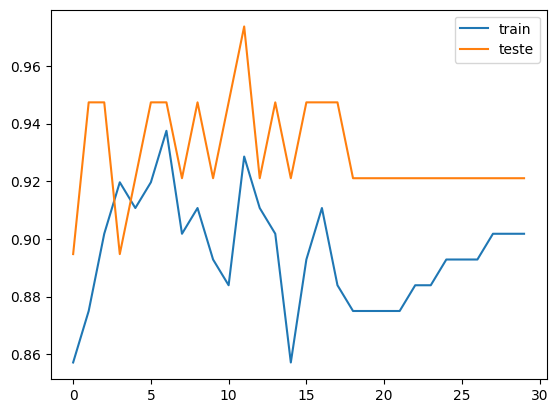

In [126]:
plt.plot(total_train_score)
plt.plot(total_test_score)
plt.legend(['train','teste'])
plt.show()

In [140]:
# help(sgdc.partial_fit)

In [141]:
# 분류 : KNN, Logist...,SVM(SVC), SGD(확률적 경사하강법), 피처공학( 2차원 3차원 차수 올리기...) Ridge, Lasso